# SPAM DATA DETECTION


APPROCH
1.   Load the data and load all the libraries
2.   Data Preparation and Data transformation
     1. Convert all text into LowerCase
     2. Remove all special characters
     3. Remove stop words
     4. Lemmatization and Stemming
3.   Vectorization
     1. TFIDF Vectorizer
4.   Machine Learning and also Deep Learning



Importing the neccessary libraries

In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
df=pd.read_csv('spam.csv',encoding='latin-1')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


- Since csv file is a comma separated file , the commas in the sentence may considered as another columns thats why unnmaed colms are formed

In [7]:
df1=df.drop(df.columns[[2,3,4]],axis=1)

- Dropping the additionl columns

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


<Axes: >

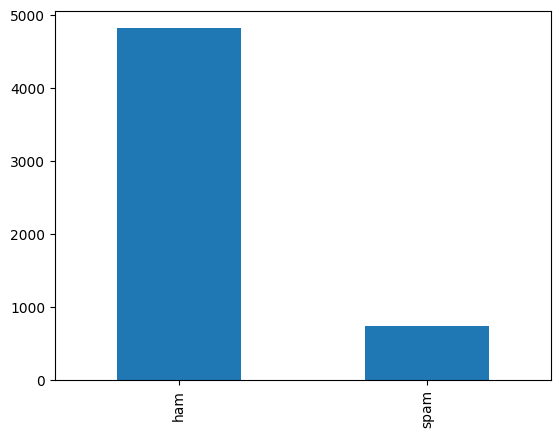

In [9]:
df1['v1'].value_counts().plot(kind='bar')

- There is imbalanced data in 'ham' and 'spam'

## Preprocessing using nltk

In [10]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re

- nltk library is for NLP problems
- wordnet is large corpus of pretrained data

In [11]:
nltk.download('stopwords')
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
nltk.download('wordnet')
def preprocess(sentence):
    sentence=str(sentence)   #CONVERT TO STRING
    sentence = sentence.lower() #CONVERT THE SENTENCE INTO LOWERCASE
    sentence=sentence.replace('{html}',"")
    cleanr = re.compile('<.*?>')            #REPLACING THE SPECIAL CHARACTERS
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)        #PREVIOUS SENTENCE GO AS A INPUT anything that starts with http
    rem_num = re.sub('[0-9]+', '', rem_url)         #PREVIOUS URL AS A INPUT
    tokenizer = RegexpTokenizer(r'\w+')             #INPUT IS WORD , IT DOES WORD TOKENIZATION
    tokens = tokenizer.tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]          #IF NOT IN STOPWORDS AND LENGTH IS GREATER THAN 2
    stem_words=[stemmer.stem(w) for w in filtered_words]       #STEM THE WORDS
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [12]:
df1['v2'] = df1['v2'].map(lambda s:preprocess(s))   #s-sentence

- applying the preprocessing to df1

In [13]:
df['v2']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

In [14]:
df1['v2']

0       jurong point crazy available bugis great world...
1                                      lar joking wif oni
2       free entry wkly comp win cup final tkts may te...
3                           dun say early hor already say
4                  nah think goes usf lives around though
                              ...                        
5567    time tried contact pound prize claim easy call...
5568                                 going esplanade home
5569                                pity mood suggestions
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: v2, Length: 5572, dtype: object

## Vectorize the test

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()

In [16]:
x=vect.fit_transform(df1['v2'])

In [17]:
x.shape                                     #document,tokens

(5572, 7386)

In [18]:
type(x)                                          #compressed sparse matrix - csr

scipy.sparse._csr.csr_matrix

* we cannot store the data in an array ......it will use more memory ......so it stores them in Compressed Sparse Row (csr)format.

* Converting v1 to the y using labe encoder

In [19]:
le = LabelEncoder()

In [20]:
y = le.fit_transform(df1['v1'])

## Splitting the data into test and train

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 123)

In [22]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4457, 7386)
(1115, 7386)
(4457,)
(1115,)


##**RANDOMIZED SEARCH CV**

In [30]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [31]:
random_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230]}

In [32]:
rf=RandomForestClassifier()

In [33]:
clf = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, random_state=123 , verbose=2)     #classifier


In [36]:
search=clf.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END criterion=log_loss, max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=230; total time=   4.8s
[CV] END criterion=log_loss, max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=230; total time=   4.6s
[CV] END criterion=log_loss, max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=230; total time=   6.5s
[CV] END criterion=log_loss, max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=230; total time=   4.6s
[CV] END criterion=log_loss, max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=230; total time=   8.6s
[CV] END criterion=log_loss, max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=180; total time=   6.3s
[CV] END criterion=log_loss, max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=180; total time=   6.4s
[CV] END criterion=log_loss, max_depth=100, min_samples_leaf=1, min_samples_split=2, n_est

In [37]:
search.best_params_

{'n_estimators': 130,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_depth': None,
 'criterion': 'gini'}

In [38]:
search.best_score_

0.9782342608949485

## GRID SEARCH

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [21]:
svc = svm.SVC()

In [22]:
clf = GridSearchCV(estimator=svc,param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})


In [23]:
search=clf.fit(x_train,y_train)

In [24]:
search.best_params_

{'C': 1, 'kernel': 'linear'}

In [25]:
search.best_score_

0.977336644974911

## Application of Naive bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB


In [ ]:
nb = GaussianNB()

In [ ]:
nb.fit(x_train.toarray(), y_train)
nb_preds_train = nb.predict(x_train.toarray())
nb_preds_test = nb.predict(x_test.toarray())
print('Train Accuracy score of the model is: ', round(accuracy_score(y_train, nb_preds_train),2))
print('Test Accuracy score of the model is: ', round(accuracy_score(y_test, nb_preds_test),2))
print("Confusion matrix to the train is",confusion_matrix(y_train, nb_preds_train))
print("Confusion matrix to the test is",confusion_matrix(y_test, nb_preds_test))

Train Accuracy score of the model is:  0.93
Test Accuracy score of the model is:  0.88
Confusion matrix to the train is [[3530  313]
 [   0  614]]
Confusion matrix to the test is [[858 124]
 [ 15 118]]


## Random forest

In [39]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train.toarray(), y_train)
preds_rf_train=rf.predict(x_train.toarray())
preds_rf_test=rf.predict(x_test.toarray())
print('Train Accuracy score of the model is: ', round(accuracy_score(y_train, preds_rf_train),2))
print('Test Accuracy score of the model is: ', round(accuracy_score(y_test, preds_rf_test),2))
print("Confusion matrix to the train is",confusion_matrix(y_train, preds_rf_train))
print("Confusion matrix to the test is",confusion_matrix(y_test, preds_rf_test))

Train Accuracy score of the model is:  1.0
Test Accuracy score of the model is:  0.98
Confusion matrix to the train is [[3843    0]
 [   0  614]]
Confusion matrix to the test is [[982   0]
 [ 23 110]]


## XG Boost

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train.toarray(), y_train)
preds_xgb_train=xgb.predict(x_train.toarray())
preds_xgb_test=xgb.predict(x_test.toarray())
print('Train Accuracy score of the model is: ', round(accuracy_score(y_train, preds_xgb_train),2))
print('Test Accuracy score of the model is: ', round(accuracy_score(y_test, preds_xgb_test),2))

Train Accuracy score of the model is:  0.99
Test Accuracy score of the model is:  0.98


## Transfer learning-Hugging face

In [23]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 51.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 63.1 MB/s eta 0:00:00


In [24]:
from transformers import pipeline
pipe = pipeline("text-classification" ,model="zhuolisam/spam-classifier")

No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'
Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [25]:
df1['v2'][0]

'jurong point crazy available bugis great world buffet cine got amore wat'

In [26]:
preds = pipe(str(df1['v2'][0]))

In [27]:
print(preds)

[{'label': 'HAM', 'score': 0.9979324340820312}]


## Gradio app

In [28]:
!pip install -q gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.9/19.9 MB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.2/294.2 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 4.4 MB/s eta 0:0

In [29]:
import gradio as gr

In [41]:
def transform(text):
  transformed_input=preprocess(input_text)
  vectorized=vect.trnsform([transformed_input])
  result=rf.predict_proba(vectorized)[0]
  return {"ham" : float(result[0]),"spam" : float(result[1])}

demo=gr.Interface(
    fn=transform,
    inputs=gr.Textbox(),
    outputs='label',
)
demo.launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>